# Image Loading and conversion

In [104]:
#import libraries

import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import HTML
from base64 import b64encode
from ultralytics import YOLO
model=YOLO('Model/plateSentry.pt')

# Image Inference

In [152]:
#Select image file

from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Create the Tkinter root window
root = Tk()
root.withdraw()  # Hide the root window

# Open a file dialogue and allow only image file formats
img_path = askopenfilename(
    filetypes=[("Image files", ["*.png","*.jpg","*.jpeg"])]
)


2023-05-17 12:52:13.933 Python[17829:271907] +[CATransaction synchronize] called within transaction
2023-05-17 12:52:13.950 Python[17829:271907] +[CATransaction synchronize] called within transaction
2023-05-17 12:52:21.171 Python[17829:271907] +[CATransaction synchronize] called within transaction


## Input Image

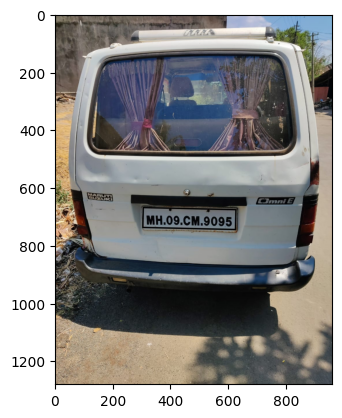

In [153]:
if isinstance(img_path, str):
    img = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


## Output Inference


image 1/1 /Users/godspeed/Desktop/Test/2.jpeg: 640x480 1 Licence-Plate, 1 Car, 46.9ms
Speed: 1.4ms preprocess, 46.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


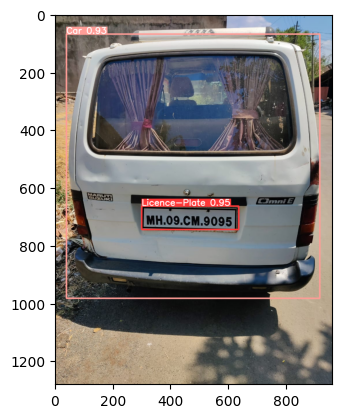

In [154]:
results = model(img_path,conf=0.2)
    # Visualize the results on the image
annotated_image = results[0].plot()
final=cv2.cvtColor(annotated_image,cv2.COLOR_BGR2RGB)
plt.imshow(final,)

# Video Inference

In [138]:
# Create the Tkinter root window
root = Tk()
root.withdraw()  # Hide the root window

# Open a file dialogue and allow only image file formats
vid_path = askopenfilename(
    filetypes=[("Video files", ["*.mp4","*.mov"])]
)

2023-05-17 12:50:28.234 Python[17829:271907] +[CATransaction synchronize] called within transaction
2023-05-17 12:50:28.252 Python[17829:271907] +[CATransaction synchronize] called within transaction
2023-05-17 12:50:31.895 Python[17829:271907] +[CATransaction synchronize] called within transaction


## Input Video

In [70]:
#video render

def show_video(path):
    mp4 = open(path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML("""
    <video width=800 controls>
      <source src="%s" type="video/mp4">
    </video>
    """ % data_url)
#compress and show video
def compress(path,compressed):
      os.remove(compressed)
      os.system(f"ffmpeg -i {path} -vcodec libx264 {compressed}")
      # Show video
      mp4 = open(compressed,'rb').read()
      data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
      return(HTML("""
            <video width=800 controls>
            <source src="%s" type="video/mp4">
            </video>
            """ % data_url))

show_video(vid_path)

## Output

### Perform Detection on video

In [71]:
from platescript import video_detection

video_detection(vid_path)



0: 384x640 1 Licence-Plate, 8 Cars, 41.8ms
Speed: 0.8ms preprocess, 41.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Licence-Plate, 10 Cars, 40.4ms
Speed: 1.1ms preprocess, 40.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Licence-Plate, 10 Cars, 40.1ms
Speed: 0.8ms preprocess, 40.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Licence-Plate, 8 Cars, 41.2ms
Speed: 0.9ms preprocess, 41.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Licence-Plate, 9 Cars, 41.2ms
Speed: 0.9ms preprocess, 41.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Licence-Plate, 7 Cars, 38.0ms
Speed: 0.9ms preprocess, 38.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Licence-Plate, 7 Cars, 37.7ms
Speed: 0.8ms preprocess, 37.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640

In [72]:

path='output.mp4'
compressed='compressed.mp4'
compress(path,compressed)

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --di

# Edge Based Recognition

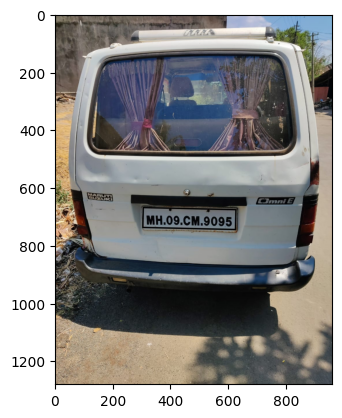

In [155]:
#load image
img = cv2.imread(img_path)
color_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(color_img)


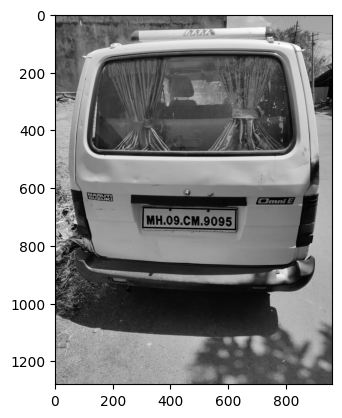

In [156]:
#convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image=cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
plt.imshow(gray_image)

## Apply filter to find edges
```
cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])
```
>Choosing appropriate values for the d, sigmaColor, and sigmaSpace parameters in cv2.bilateralFilter() is important to achieve the desired level of smoothing while preserving edges and details in the image. Here are some general guidelines for choosing these parameters:

* d:

>This parameter determines the size of the pixel neighborhood used during filtering. Typically, a value of 5 to 10 is used for smaller images, while larger images may require larger values of d. Increasing the value of d will result in more smoothing across larger areas of the image.
* sigmaColor:

>This parameter controls the color dissimilarity between pixels that will be smoothed. A larger value of sigmaColor will result in more dissimilarity being removed, while a smaller value will preserve more of the original color information. Typically, a value of 10 to 50 is used for this parameter.
* sigmaSpace:

>This parameter controls the spatial dissimilarity between pixels that will be smoothed. A larger value of sigmaSpace will result in more smoothing across larger distances, while a smaller value will preserve more of the original image structure. Typically, a value of 10 to 150 is used for this parameter.

>In general, choosing appropriate values for these parameters involves balancing the amount of smoothing needed to achieve the desired effect with the need to preserve important details and edges in the image. Experimenting with different values for these parameters can help determine the best values for a particular image and task.

In [157]:
#Apply bilateral filter 

filter=cv2.bilateralFilter(gray,10,17,17)                #reduces noise


### Egde detection
> `cv2.Canny()` is an edge detection algorithm in OpenCV used to detect a wide range of edges in an image.
```
cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])

```

>The cv2.Canny() function takes the following parameters:
> * image: The input image, usually grayscale.
> * threshold1: The lower threshold value to detect edges.
> * threshold2: The higher threshold value to detect edges.
> * edges: An optional output array to store the edges found. If not provided, a new image will be created.
> * apertureSize: An optional parameter that sets the size of the Sobel kernel used to calculate image gradients. By default, it is set to 3.
> * L2gradient: An optional parameter that specifies whether to use the L2 norm to calculate gradients. By default, it is set to False, which means the L1 norm is used.


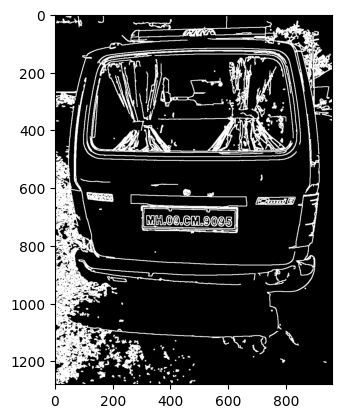

In [158]:
#find egdes
edges=cv2.Canny(filter,threshold1=30,threshold2=200)    
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
edges = cv2.dilate(edges, kernel, iterations=1)
edges_rgb=cv2.cvtColor(edges,cv2.COLOR_BGR2RGB)

#show edges
plt.imshow(edges_rgb)


### Locate the number plate

> Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

```
cv2.findContours()
```
>RETR_TREE finds all the promising contour lines and reconstructs a full hierarchy of nested contours. The method cv2. CHAIN_APPROX_SIMPLE returns only the endpoints that are necessary for drawing the contour line.

In [159]:
#find coordinates and draw contours

coordinates=cv2.findContours(edges.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

contours=imutils.grab_contours(coordinates)

#sort
contours=sorted(contours,key=cv2.contourArea, reverse=True)[:10]

In [160]:
contours

[array([[[517, 117]],
 
        [[516, 118]],
 
        [[471, 118]],
 
        ...,
 
        [[521, 117]],
 
        [[520, 118]],
 
        [[519, 117]]], dtype=int32),
 array([[[550, 129]],
 
        [[551, 128]],
 
        [[579, 128]],
 
        ...,
 
        [[446, 130]],
 
        [[473, 130]],
 
        [[474, 129]]], dtype=int32),
 array([[[102, 240]],
 
        [[102, 243]],
 
        [[101, 244]],
 
        ...,
 
        [[103, 246]],
 
        [[104, 245]],
 
        [[104, 240]]], dtype=int32),
 array([[[592,   0]],
 
        [[592,   8]],
 
        [[591,   9]],
 
        ...,
 
        [[593,  11]],
 
        [[594,  10]],
 
        [[594,   0]]], dtype=int32),
 array([[[449, 605]],
 
        [[448, 606]],
 
        [[447, 606]],
 
        [[443, 610]],
 
        [[443, 611]],
 
        [[442, 612]],
 
        [[442, 619]],
 
        [[443, 620]],
 
        [[443, 623]],
 
        [[444, 624]],
 
        [[444, 625]],
 
        [[445, 626]],
 
        [[445, 627]],
 


### `approxPolyDP()` 

>The function `cv2.approxPolyDP(input_curve,epsilon,closed)` approximates a curve or a polygon with another curve/polygon with less vertices so that the distance between them is less or equal to the specified precision.
where
>* input_curve represents the input polygon whose contour must be approximated with specified precision
>* epsilon represents the maximum distance between the approximation of a shape contour of the input polygon and the original input polygon
>* closed is a Boolean value whose value is true if the approximated curve is closed or the value is false if the approximated curve is not closed



### Working of `approxPolyDP()` function in OpenCV
> * The process of approximating the shape of a contour of a given polygon to the shape of the original polygon to the specified precision is called approximation of a shape of the contour.
> * We make use of a function in OpenCV called approxPolyDP() function to perform an approximation of a shape of a contour.
> * The image of a polygon whose shape of a contour must be approximated is read using the imread() function.
> * Then the input image is converted into a grayscale image.
> * Then thresholding function is applied on the grayscale image to convert it into a binary image.
> * Then the contours present in the image are determined using findContours() function.
> * Then for each of the contours determined in the image, the approxPolyDP() function is applied to determine the shape of the polygons present in the image.
> * Then the determined shape of the contours is drawn on the image using drawContours() function and then displayed as the output of the program.


In [161]:
#find location of number plate
        
    # approximate the contour
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
loc=None
for point in contours:
    perimeter = cv2.arcLength(point, True)
    approx = cv2.approxPolyDP(point, 0.018 * perimeter, True)
    
    if len(approx)==4:
        loc=approx
        break


In [162]:
loc

array([[[303, 669]],

       [[624, 675]],

       [[624, 745]],

       [[303, 740]]], dtype=int32)

### Apply mask

In [163]:
mask=np.zeros(gray.shape[0:2],np.uint8)

#### Generate new image using drawContours() function
```
drawContours(image,contours,contourIdx,color[,thickness[,lineType[,hierarchy[,maxLevel[,offset]]]]])
```

#### Perform bitwise AND to merge those images
```
bitwise_and(source1_array, source2_array, destination_array, mask)
```

In [164]:
plate=cv2.drawContours(mask,[loc],0,255,-1)

In [165]:
#merge

plate=cv2.bitwise_and(img,img,mask=mask)

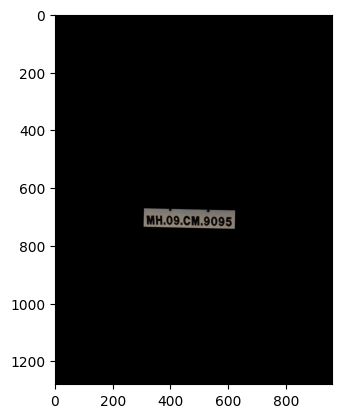

In [166]:
plt.imshow(plate)

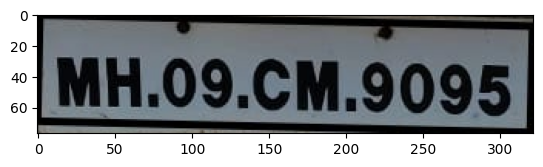

In [167]:
#crop image using coordinates
#select x,y coordinates where mask colour is black

(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))

final_plate=color_img[x1:x2+1,y1:y2+1]
plt.imshow(final_plate)

In [168]:
#Apply OCR

import easyocr

reader=easyocr.Reader(['en'],gpu=True)
result=reader.readtext(final_plate)

result

[([[7, 17], [314, 17], [314, 74], [7, 74]], 'MHO9 CM9095', 0.7389170277817673)]

In [169]:
#Show result
text=''
for i in range(len(result)):
    text+=result[i][-2]
print(text)
accuracy=[]
for i in  range(len(result)):
    accuracy.append(result[i][-1])
print("Accuracy : ", np.mean(accuracy )*100 ,"%")

MHO9 CM9095
Accuracy :  73.89170277817672 %


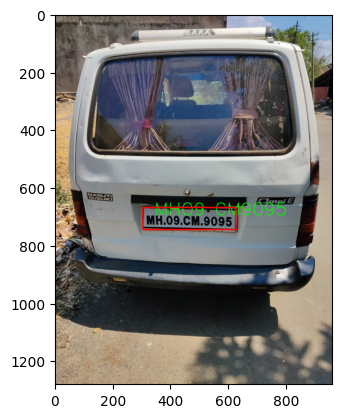

In [170]:
#render
font = cv2.FONT_HERSHEY_SIMPLEX  # select font
text_position = (approx[0][0][0] + 40, approx[1][0][1] + 20)  # adjust text position
render = cv2.putText(color_img, text=text, org=text_position, fontFace=font, fontScale=2, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_8)
render = cv2.rectangle(color_img, tuple(approx[0][0]), tuple(approx[2][0]), (255, 0, 0), 3)
plt.imshow(render)




# Live Feed

In [1]:
from platescript import livefeed
livefeed()


0: 384x640 (no detections), 43.4ms
Speed: 2.2ms preprocess, 43.4ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Car, 52.8ms
Speed: 2.0ms preprocess, 52.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Car, 44.2ms
Speed: 1.6ms preprocess, 44.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Car, 43.3ms
Speed: 1.6ms preprocess, 43.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Car, 41.8ms
Speed: 1.5ms preprocess, 41.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Car, 41.8ms
Speed: 1.6ms preprocess, 41.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Car, 42.6ms
Speed: 1.9ms preprocess, 42.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Car, 41.7ms
Speed: 1.5ms preprocess, 41.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 38

: 